In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
df=pd.read_csv('census_income.csv')

# Importing The DataSet

In [254]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# EDA

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [256]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [257]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From Above :
* The columns contain both Numerical and Categorical 
*There is no null in df


The column Capital gain and Capital loss contains most of the vaues as 0.00 so I remove it from my dataset

In [258]:
df=df.drop(['Capital_gain','Capital_loss'],axis=1)

In [259]:
df.shape

(32560, 13)

Those columns are successfully removed

Now lets split the columns in cat and Numerical and analyse for values

In [260]:
cat_data=df.select_dtypes(include=[np.object]).columns

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/2241083481.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_data=df.select_dtypes(include=[np.object]).columns


In [261]:
cat_data

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [262]:
num_data=df.select_dtypes(include=[np.int64]).columns

In [263]:
num_data

Index(['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week'], dtype='object')

# Data Reconstruction

In [264]:
df.Workclass=df.Workclass.str.replace('?','Private')

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/335816511.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Workclass=df.Workclass.str.replace('?','Private')


In [265]:
for i in df:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
9     10501
10     7291
1

In [266]:
df['Native_country']=df.Native_country.str.replace('?','United-States')

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/3242934316.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Native_country']=df.Native_country.str.replace('?','United-States')


In [267]:
df['Occupation']=df.Occupation.str.replace('?','Other-service ')

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/253916814.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Occupation']=df.Occupation.str.replace('?','Other-service ')


In [268]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],' School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors'],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [269]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [270]:
df.Education.value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
 School               4253
 Post_Graduation      1723
 PhD                   413
Name: Education, dtype: int64

In [271]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [272]:
df.Marital_status.value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [273]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# UNIVARIENT & BIVARIENT ANALYSIS

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

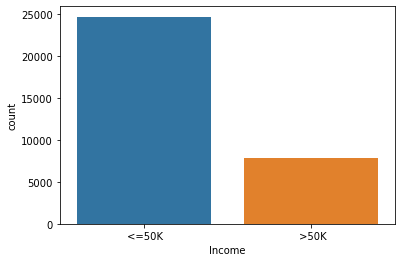

In [274]:
sns.countplot(df['Income'],data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

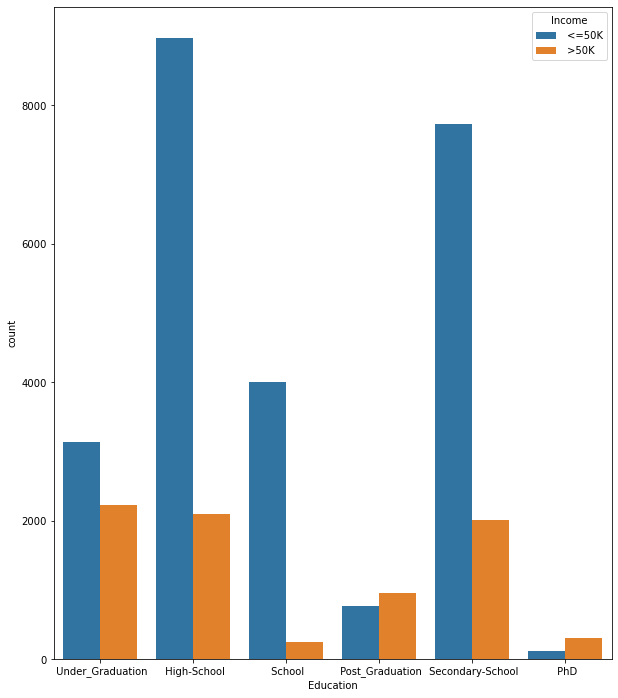

In [275]:
plt.figure(figsize=(10,12))
sns.countplot(df['Education'],hue=df['Income'],data=df)

Here we could observe that the person who completed highschool is majority and erans greater than 50k as avg followed by secondary school

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

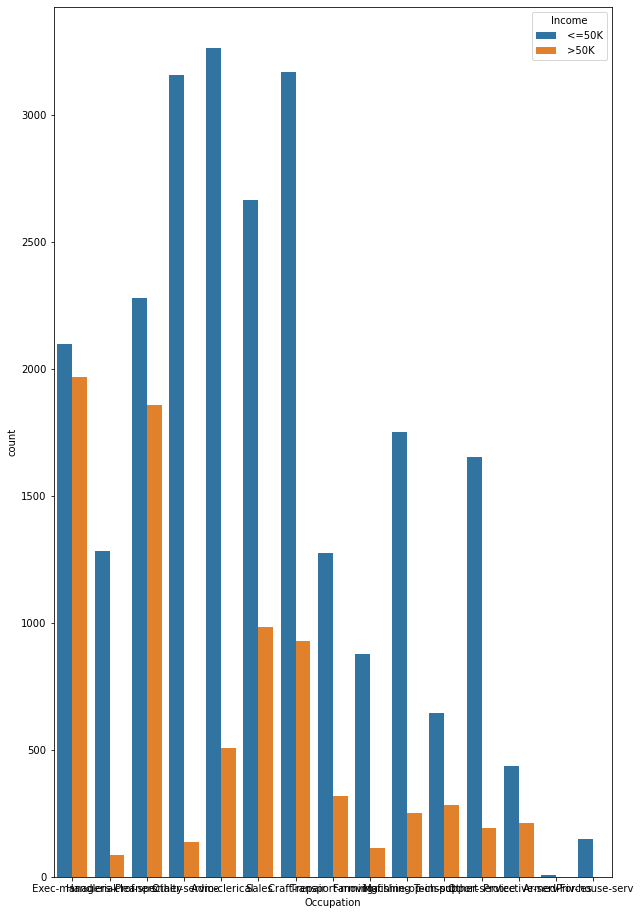

In [276]:
plt.figure(figsize=(10,16))
sns.countplot(df['Occupation'],hue=df['Income'],data=df)

observations:
    Here the NeverMarried earns Higher followed by Married civ spouse 

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

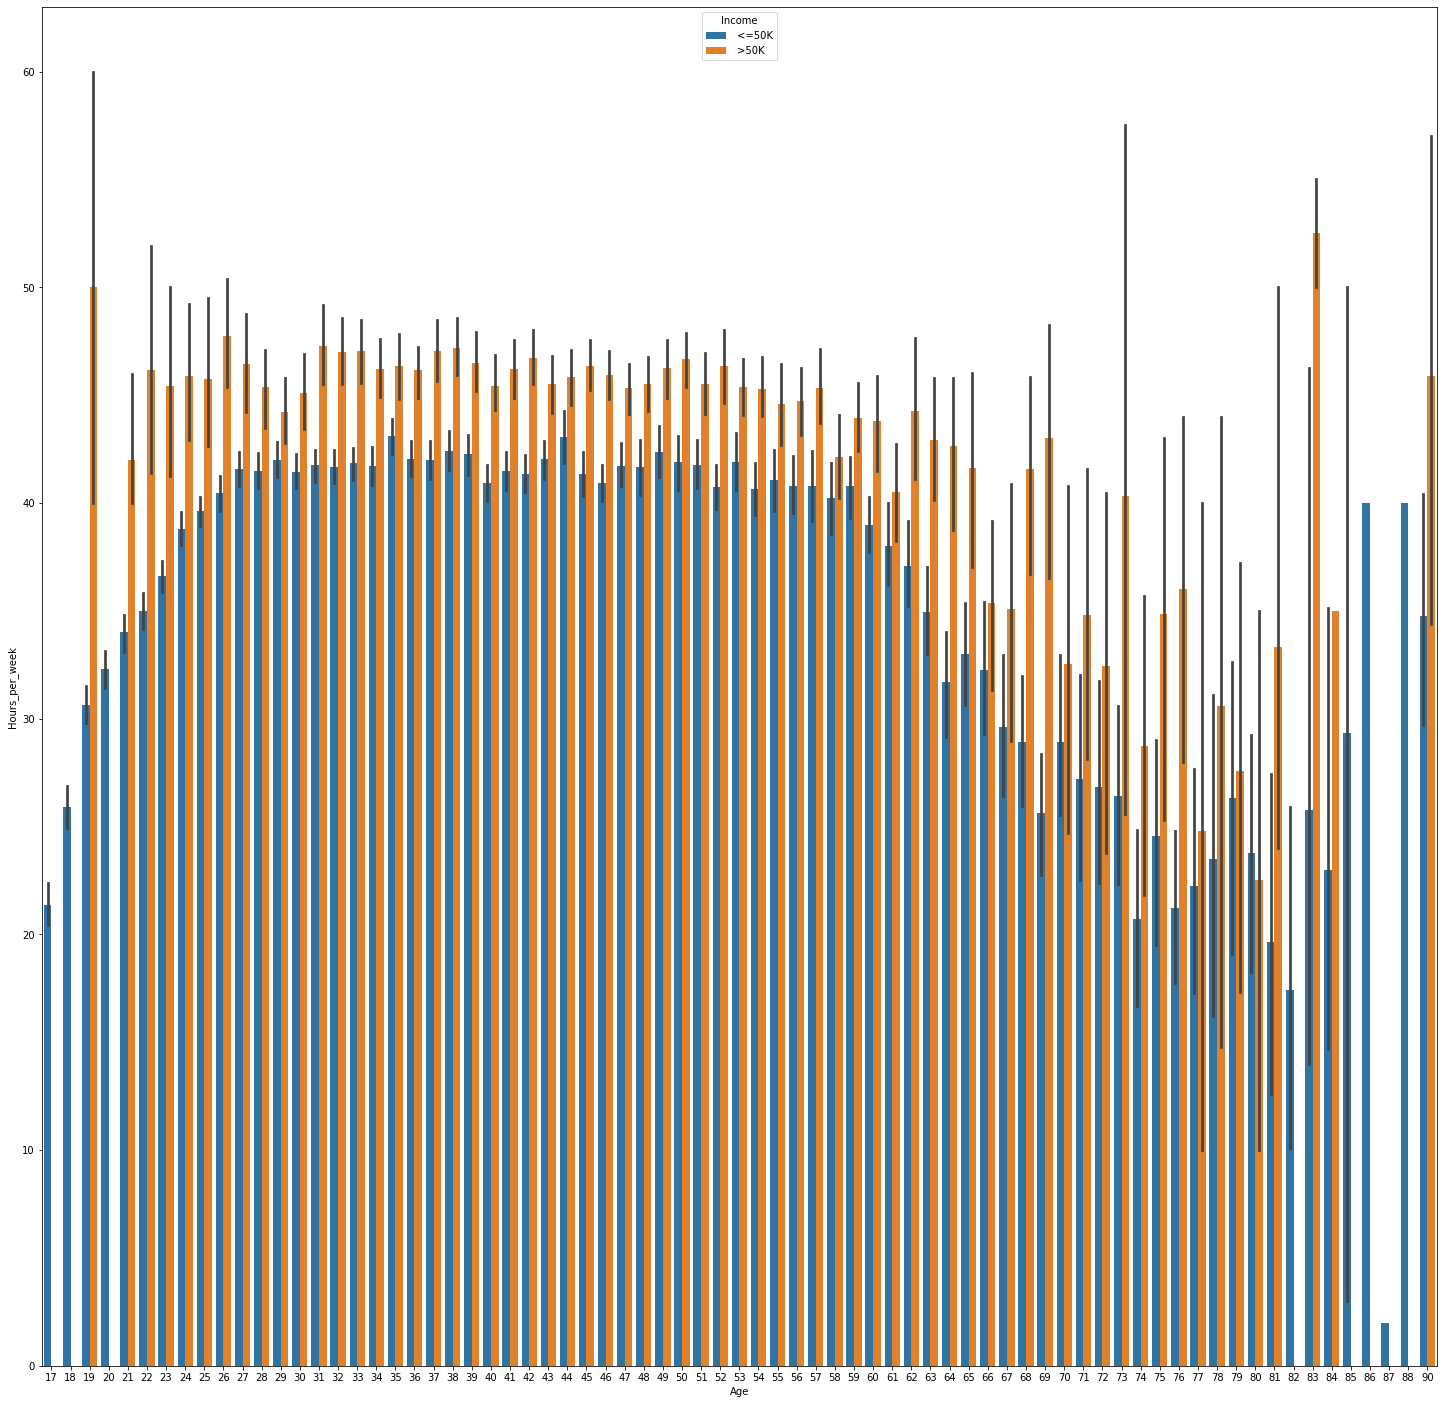

In [277]:
plt.figure(figsize=(25,25))
sns.barplot(x=df['Age'],y=df['Hours_per_week'],hue=df['Income'],data=df)

from the above we could see that 
The most hours working are the ones who earns higher and also they are in b/w the age of 24 to 64

<AxesSubplot:xlabel='Education', ylabel='Age'>

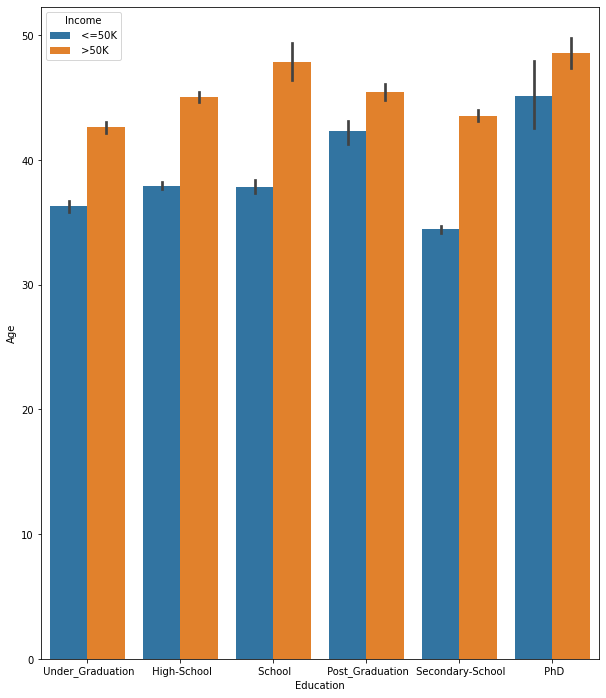

In [278]:
plt.figure(figsize=(10,12))
sns.barplot(x=df['Education'],y=df['Age'],hue=df['Income'],data=df)

One who completed phd earns higher  in avg i.e greated than 50k followed by PostGrad

Their avg age to earn greater than 50k is 40


<AxesSubplot:xlabel='Education', ylabel='count'>

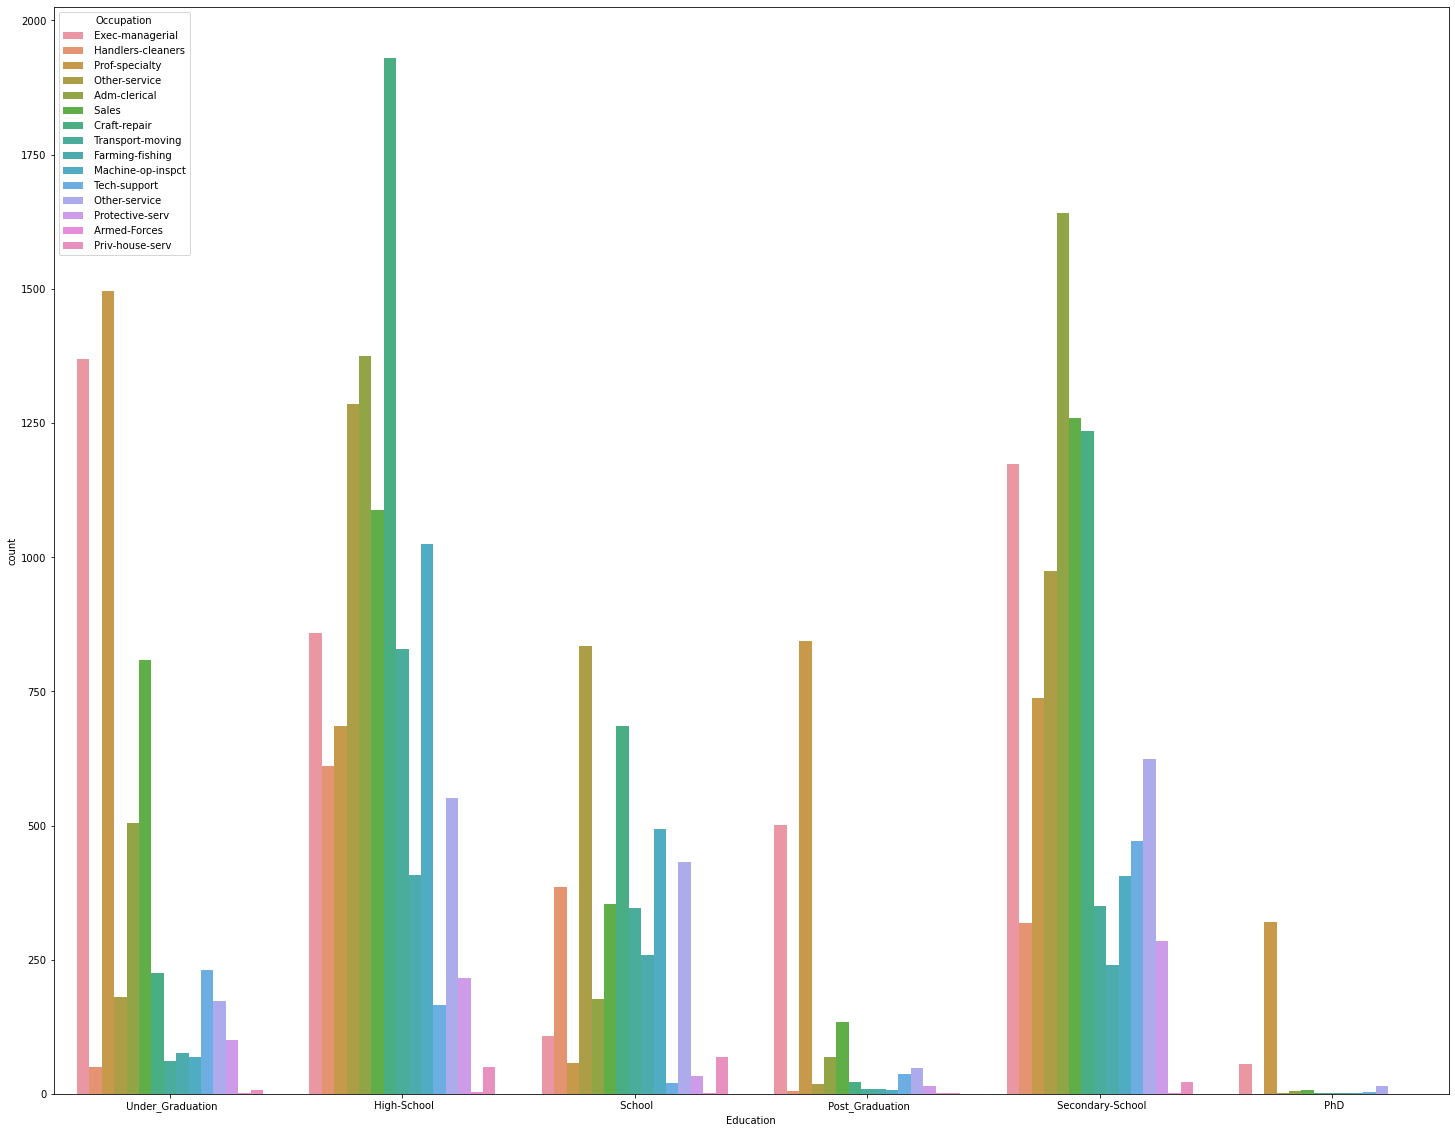

In [279]:
plt.figure(figsize=(25,20))
sns.countplot(x=df['Education'],hue=df['Occupation'],data=df)

The one who completed High school are mostly in Tech support 

The one who completed Ug are mostly prof_speciality,armed forces

The one who completed secondary school are in admin clirical

The pG and PHd about 70% are in Prof_Speciality


Now let us  Visualise with the income

<AxesSubplot:xlabel='Occupation', ylabel='Hours_per_week'>

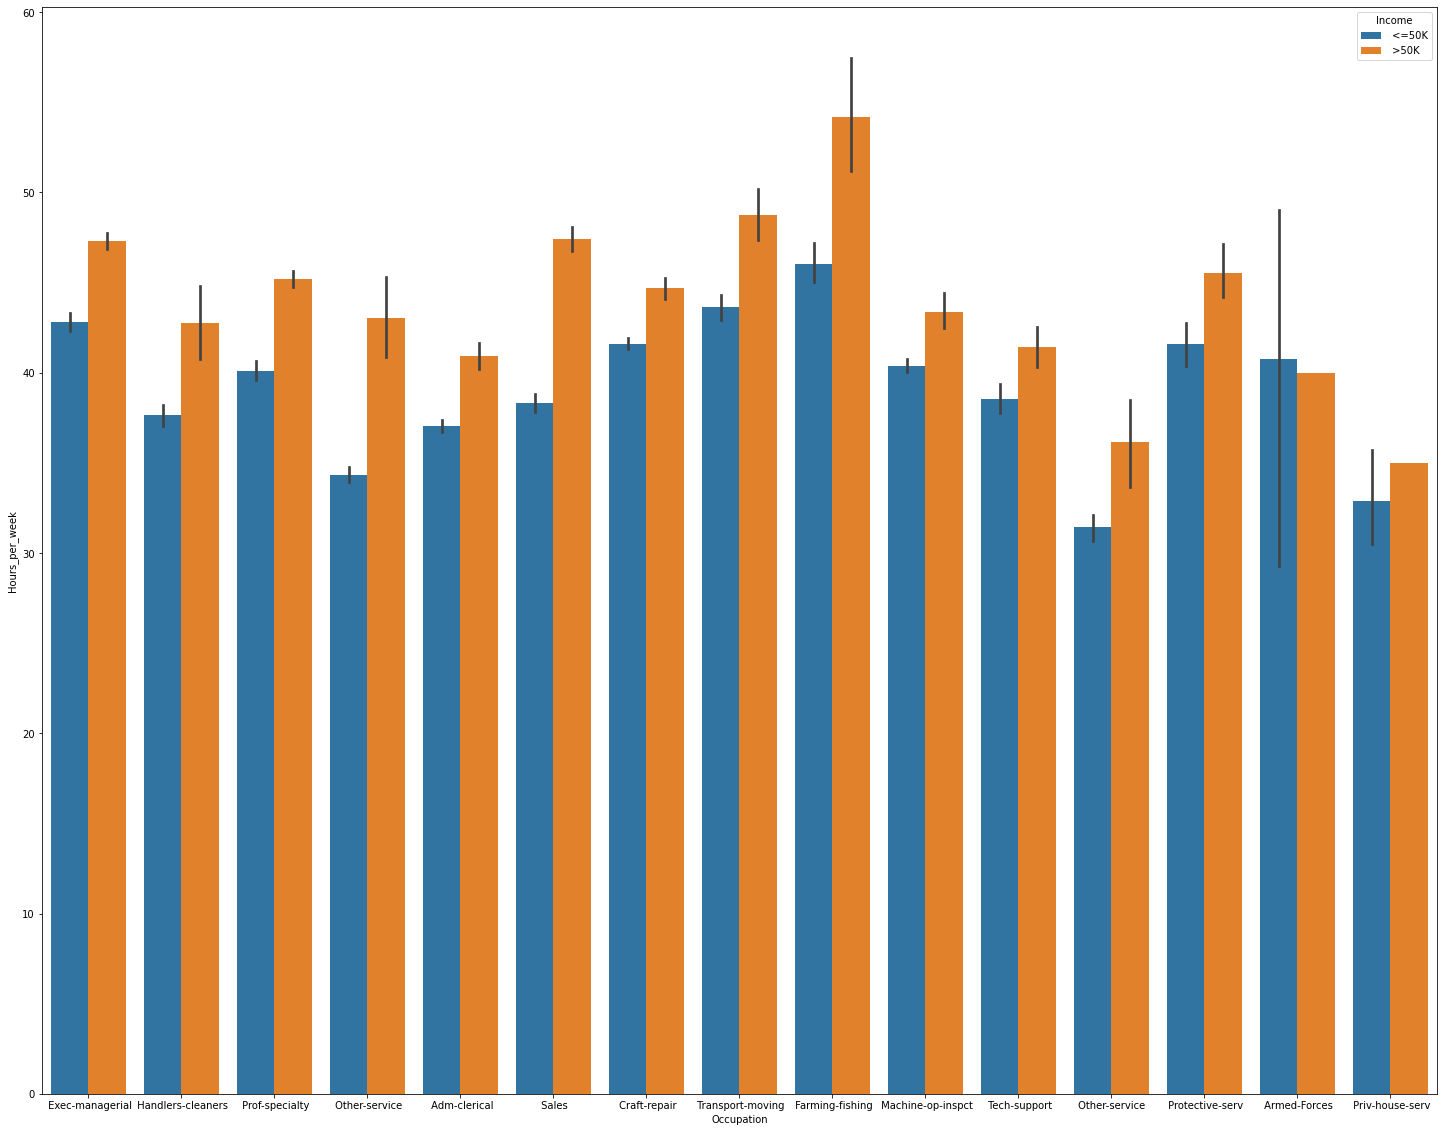

In [280]:
plt.figure(figsize=(25,20))
sns.barplot(x=df['Occupation'],y=df['Hours_per_week'],hue=df['Income'],data=df)

we could observe that the farming and fishing are the one who earns higher as avg i.e greater than 50k
Followed by Exec_managerial


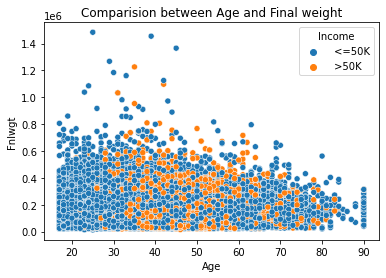

In [281]:
sns.scatterplot(x='Age',y='Fnlwgt',data=df,hue='Income');
plt.title('Comparision between Age and Final weight')
plt.show()

PEOPLE AGE FROM 17 TO 80 HAVE FINAL WEIGHT <=50K

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


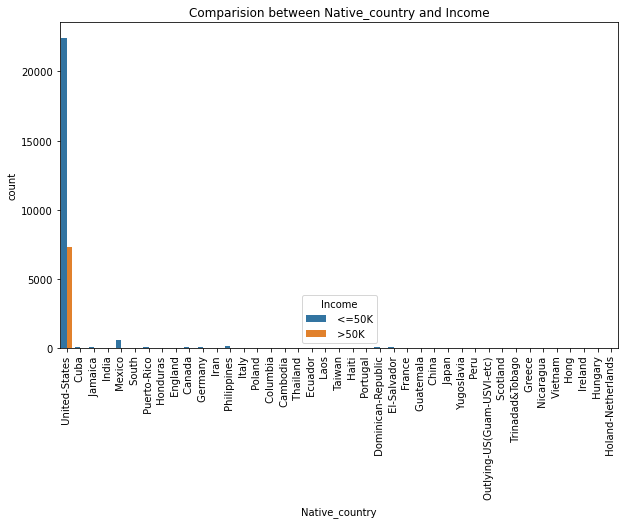

In [109]:
plt.figure(figsize=(10,6))
sns.countplot(df['Native_country'],hue=df['Income'])
plt.title('Comparision between Native_country and Income')
plt.xticks(rotation=90)
plt.show()

MAJORITY OF THE PEOPLE ARE FROM UNITED STATED FOLLOWED BY CUBA
THE PEOPLE FROM UNITED_STATES EARNS HIGHER i.e <=50K

<AxesSubplot:xlabel='Sex', ylabel='Age'>

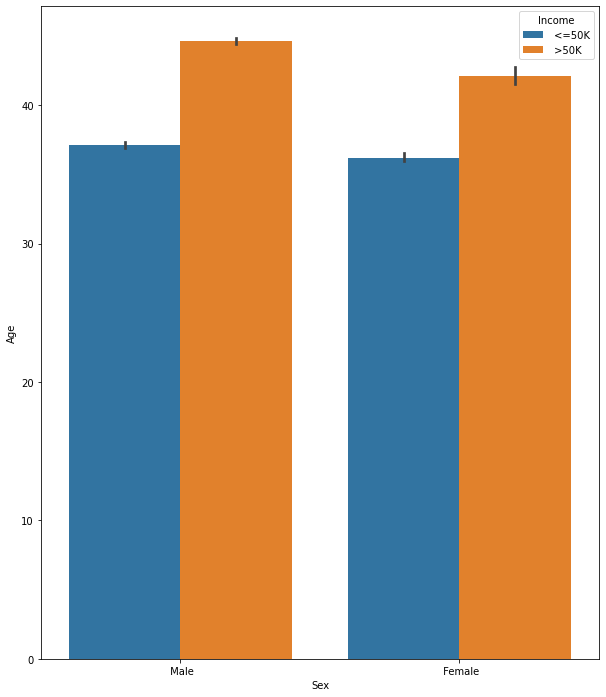

In [282]:
plt.figure(figsize=(10,12))
sns.barplot(x=df['Sex'],y=df['Age'],hue=df['Income'],data=df)

both Male and female earns<=50k by age of 30 to 40

The people who earns less than 50k are male compared to female 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

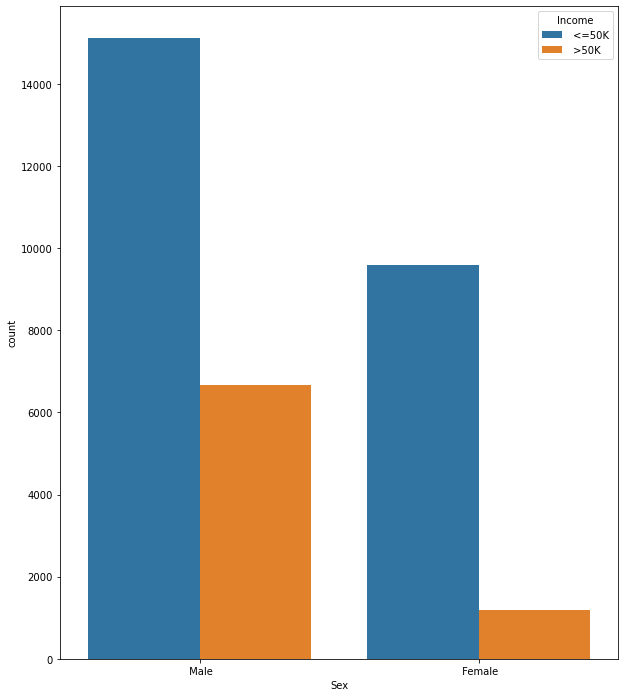

In [115]:
plt.figure(figsize=(10,12))
sns.countplot(df['Sex'],hue=df['Income'],data=df)

The majority are Men in the dataset 

Men earns <=50k higher in avg

# MULTIVARIENT ANALYSIS

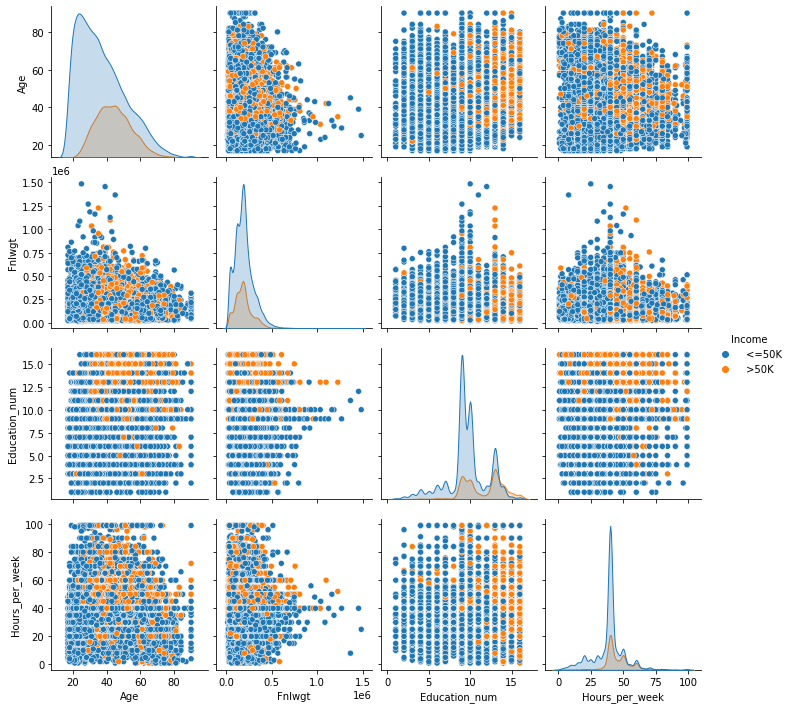

In [283]:
sns.pairplot(df,hue='Income')

from the above relation we can observe that the all the features have corr with target

skewness can be observed will remove them by follow

# OUTLIERS HANDLING

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-p

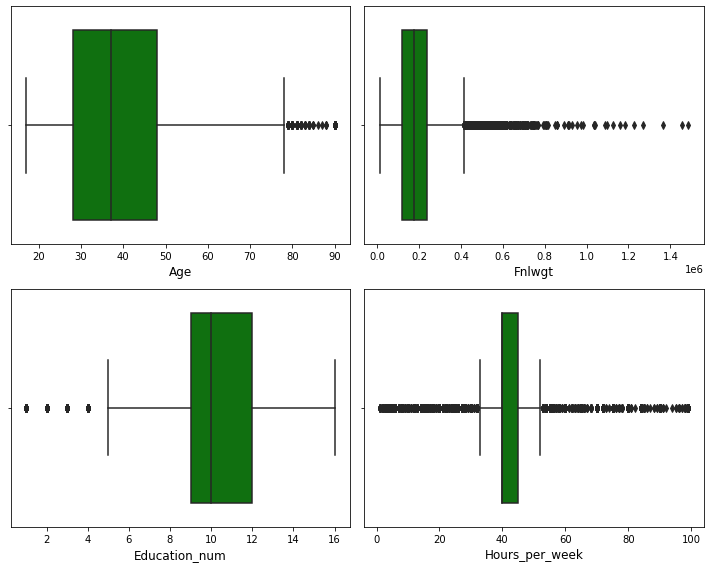

In [284]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in num_data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [285]:
features = df[['Age','Fnlwgt','Education_num','Hours_per_week']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

Age    Fnlwgt  Education_num  Hours_per_week
0      0.837097  1.008742       1.134779        2.222120
1      0.042640  0.245046       0.420027        0.035430
2      1.057031  0.425770       1.197429        0.035430
3      0.775755  1.408146       1.134779        0.035430
4      0.115952  0.898170       1.523480        0.035430
...         ...       ...            ...             ...
32555  0.849066  0.639710       0.746077        0.197407
32556  0.103982  0.335466       0.420027        0.035430
32557  1.423589  0.358811       0.420027        0.035430
32558  1.215624  0.110927       0.420027        1.655200
32559  0.983720  0.929862       0.420027        0.035430

[32560 rows x 4 columns]

In [286]:
new_df = df[(z<3).all(axis=1)]
new_df

Age          Workclass  Fnlwgt          Education  Education_num  \
0       50   Self-emp-not-inc   83311   Under_Graduation             13   
1       38            Private  215646        High-School              9   
2       53            Private  234721             School              7   
3       28            Private  338409   Under_Graduation             13   
4       37            Private  284582    Post_Graduation             14   
...    ...                ...     ...                ...            ...   
32555   27            Private  257302   Secondary-School             12   
32556   40            Private  154374        High-School              9   
32557   58            Private  151910        High-School              9   
32558   22            Private  201490        High-School              9   
32559   52       Self-emp-inc  287927        High-School              9   

      Marital_status          Occupation    Relationship    Race      Sex  \
0            Married     Exec-managerial         Husband   White     Male   
1             Others   Handlers-cleaners   Not-in-family   White     Male   
2            Married   Handlers-cleaners         Husband   Black     Male   
3            Married      Prof-specialty            Wife   Black   Female   
4            Married     Exec-managerial            Wife   White   Female   
...              ...                 ...             ...     ...      ...   
32555        Married        Tech-support            Wife   White   Female   
32556        Married   Machine-op-inspct         Husband   White     Male   
32557         Others        Adm-clerical       Unmarried   White   Female   
32558         Single        Adm-clerical       Own-child   White     Male   
32559        Married     Exec-managerial            Wife   White   Female   

       Hours_per_week  Native_country  Income  
0                  13   United-States   <=50K  
1                  40   United-States   <=50K  
2                  40   United-States   <=50K  
3                  40            Cuba   <=50K  
4                  40   United-States   <=50K  
...               ...             ...     ...  
32555              38   United-States   <=50K  
32556              40   United-States    >50K  
32557              40   United-States   <=50K  
32558              20   United-States   <=50K  
32559              40   United-States    >50K  

[31461 rows x 13 columns]

In [287]:
df.shape

(32560, 13)

In [124]:
new_df.shape

(31461, 13)

In [288]:
(32560-31261)/32560*100

3.98955773955774

We Have about 4 percent DataLoss

In [289]:
new_df.skew()

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/3313494185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

There is slight skewness in Fnlwgt let us remove it

In [290]:
new_df['Fnlwgt']=np.sqrt(new_df['Fnlwgt'])

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/3600324031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Fnlwgt']=np.sqrt(new_df['Fnlwgt'])


In [291]:
new_df.skew()

C:\Users\dell\AppData\Local\Temp/ipykernel_2712/3313494185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


Age               0.472279
Fnlwgt           -0.105115
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Now the skewness has been removed let us find the distribution

# ECODING

In [292]:
from sklearn.preprocessing import LabelEncoder

In [293]:
LE=LabelEncoder()
LE.fit
new_df[cat_data]=new_df[cat_data].apply(LE.fit_transform)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [294]:
new_df

Age  Workclass      Fnlwgt  Education  Education_num  Marital_status  \
0       50          5  288.636450          5             13               0   
1       38          3  464.377002          0              9               1   
2       53          3  484.480134          3              7               0   
3       28          3  581.729318          5             13               0   
4       37          3  533.462276          2             14               0   
...    ...        ...         ...        ...            ...             ...   
32555   27          3  507.249446          4             12               0   
32556   40          3  392.904569          0              9               0   
32557   58          3  389.756334          0              9               1   
32558   22          3  448.876375          0              9               2   
32559   52          4  536.588297          0              9               0   

       Occupation  Relationship  Race  Sex  Hours_per_week  Native_country  \
0               3             0     4    1              13              38   
1               5             1     4    1              40              38   
2               5             0     2    1              40              38   
3              10             5     2    0              40               4   
4               3             5     4    0              40              38   
...           ...           ...   ...  ...             ...             ...   
32555          13             5     4    0              38              38   
32556           6             0     4    1              40              38   
32557           0             4     4    0              40              38   
32558           0             3     4    1              20              38   
32559           3             5     4    0              40              38   

       Income  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
32555       0  
32556       1  
32557       0  
32558       0  
32559       1  

[31461 rows x 13 columns]

Now our data is Encoded Let us find te corr()

<AxesSubplot:>

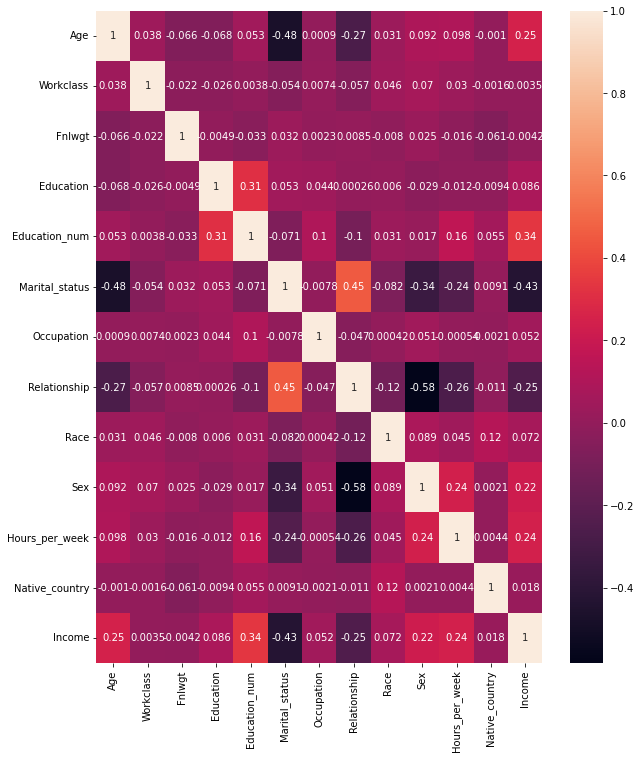

In [295]:
plt.figure(figsize=(10,12))
sns.heatmap(new_df.corr(),annot=True)

From above The Marital status and Relationship have negative corr with the target 

Race,Edu_num ,Hours_per_week,Sex,Age has postive corr with the target

Now will Split the Feature and target 

In [296]:
x=new_df.drop(['Income'],axis=1)
y=new_df['Income']

In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Now lets check if the labels is balance if now we will balance it with sampling Technique

In [299]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

Its Not Balanced ,Let us balance it With Oversampling

In [300]:
from imblearn.over_sampling import SMOTE

In [301]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [302]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

Now Its Balanced 

Let us train the model and proceed For our Modelling

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

# MODELING

In [306]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [307]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)

dec_pred=dec.predict(x_test)

In [308]:
print(accuracy_score(y_test,dec_pred))
print(confusion_matrix(y_test,dec_pred))
print(classification_report(y_test,dec_pred))

0.8283957518166574
[[5813 1370]
 [1086 6043]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7183
           1       0.82      0.85      0.83      7129

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



In [309]:
print(cross_val_score(dec,x,y,cv=5).mean())

0.8348023162773043


In [310]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


rf_pred=rf.predict(x_test)

In [311]:
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.8734628283957518
[[6094 1089]
 [ 722 6407]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7183
           1       0.85      0.90      0.88      7129

    accuracy                           0.87     14312
   macro avg       0.87      0.87      0.87     14312
weighted avg       0.87      0.87      0.87     14312



In [312]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8751537666505251


In [188]:
log=LogisticRegression()
log.fit(x_train,y_train)

log_pred=log.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
print(accuracy_score(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

0.8065259921743991
[[5147 2036]
 [ 733 6396]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      7183
           1       0.76      0.90      0.82      7129

    accuracy                           0.81     14312
   macro avg       0.82      0.81      0.81     14312
weighted avg       0.82      0.81      0.80     14312



In [202]:
print(cross_val_score(log,x,y,cv=5).mean())

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8049100495383238


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
knn=KNN()
knn.fit(x_train,y_train)


knn_pred=knn.predict(x_test)

In [192]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.7931106763555059
[[4793 2390]
 [ 571 6558]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      7183
           1       0.73      0.92      0.82      7129

    accuracy                           0.79     14312
   macro avg       0.81      0.79      0.79     14312
weighted avg       0.81      0.79      0.79     14312



In [203]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.8030021302013081


In [313]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


gbc_pred=gbc.predict(x_test)

In [314]:
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.8511039686975964
[[5760 1423]
 [ 708 6421]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      7183
           1       0.82      0.90      0.86      7129

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



In [315]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8488464604139475


from above i think the Gradient boost is a good working model let us HYpertune to Increase accuracy

In [316]:
from sklearn.model_selection import GridSearchCV

In [317]:
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [318]:
gcv=GridSearchCV(gbc,parameters,cv=5)

In [319]:
gcv.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\dell\anacon

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [320]:
gcv.best_params_ 

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [324]:
DEC=GradientBoostingClassifier(criterion='mse',max_depth=8,max_features='log2',n_estimators=200)

In [325]:
DEC.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: F

GradientBoostingClassifier(criterion='mse', max_depth=8, max_features='log2',
                           n_estimators=200)

In [327]:
DEC_pred=DEC.predict(x_test)

In [328]:
print(accuracy_score(y_test,DEC_pred))
print(confusion_matrix(y_test,DEC_pred))
print(classification_report(y_test,DEC_pred))

0.8737423141419788
[[6046 1137]
 [ 670 6459]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7183
           1       0.85      0.91      0.88      7129

    accuracy                           0.87     14312
   macro avg       0.88      0.87      0.87     14312
weighted avg       0.88      0.87      0.87     14312



hence our accuracy increased by 3 percent 

In [330]:
from sklearn.metrics import plot_roc_curve

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


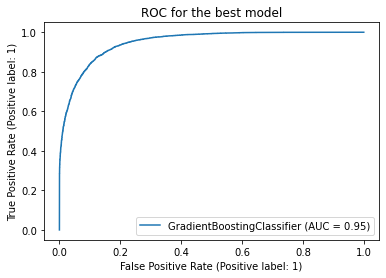

In [331]:
plot_roc_curve(DEC, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [332]:
#saving the model
import pickle
filename='census predicton'
pickle.dump('rd',open(filename,'wb'))